# Final Project
Matthew Senseman

In [47]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
def pause():
# pauses until a keyboard entry
    print('\r')
    dummy = input('Pause: Press any key to continue.')
    print('\r')

## Plotting the Data and Detrending It
Reads/loads in the data from both of the provided files, then plots the original data as well as detrends and plots the data again.

In [48]:
print('Part 1a: Loading in galaxy spectrum and plotting it...')

Part 1a: Loading in galaxy spectrum and plotting it...


In [49]:
data = pyfits.getdata('spec-0429-51820-0056.fits.gz')
flux = np.array([i[0] for i in data]) 
wavelength = np.array([ 10**i[1] for i in data]) 

In [50]:
rest = np.genfromtxt('linelist-0429-51820-0056.csv',delimiter=',',skip_header=1).T
rest_wavelengths = rest[1]

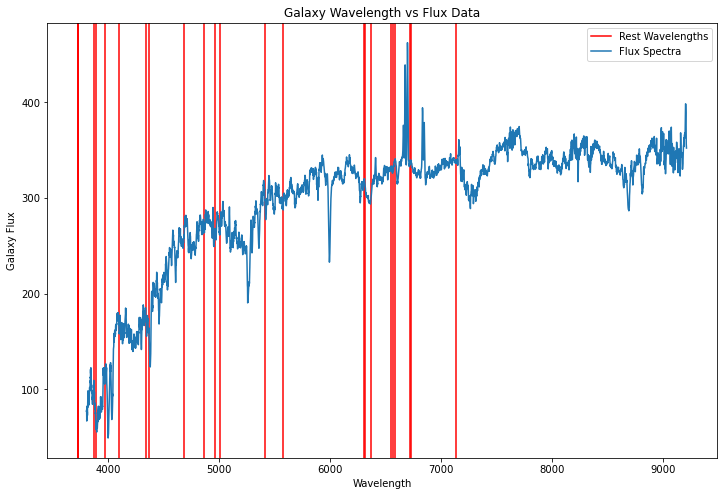

In [51]:
plt.figure(figsize=(12,8))
for i in rest_wavelengths:
    plt.axvline(i,color='red')
plt.axvline(3727.1,color='red',label='Rest Wavelengths') #sets the label for rest wavelengths
plt.plot(wavelength,flux,label='Flux Spectra')
plt.title('Galaxy Wavelength vs Flux Data');plt.xlabel('Wavelength');plt.ylabel('Galaxy Flux')
plt.legend()
plt.show()

#commenting this plot out for cleaner command line output

plt.figure(figsize=(12,8))
for i in rest_wavelengths:
    plt.axvline(i,color='red')
plt.plot(wavelength,flux)
plt.title('Galaxy Wavelength vs Flux Data');plt.xlabel('Wavelength');plt.ylabel('Galaxy Flux')
plt.legend()
plt.xlim(6000,7500)
plt.show()

In [52]:
pause()


Pause



In [53]:
print('Part 1b: Detrending galaxy spectrum and plotting it...')

Part 1b: Detrending galaxy spectrum and plotting it...


In [54]:
a,b,c,d,e = np.polyfit(wavelength,flux,deg=4)
flux_trend = a*(wavelength**4)+ b*(wavelength**3)+ c*(wavelength**2) + d*(wavelength) + e

new_flux = flux-np.mean(flux) #subtracting mean from data
new_flux = new_flux-flux_trend #subtracting trend line from data

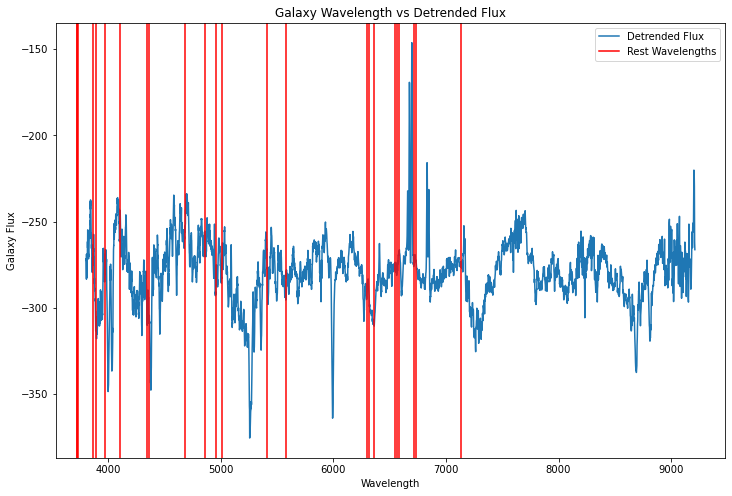

In [55]:
plt.figure(figsize=(12,8))
plt.plot(wavelength,new_flux,label='Detrended Flux')
for i in rest_wavelengths:
    plt.axvline(i,color='red')
plt.axvline(3727.1,color='red',label='Rest Wavelengths') #sets the label for rest wavelengths
plt.title('Galaxy Wavelength vs Detrended Flux');plt.xlabel('Wavelength');plt.ylabel('Galaxy Flux')
plt.legend()
plt.show()

In [56]:
pause()


Pause



## Using Cross Correlation
Creates an array from the rest wavelengths, then applies the cross-correlation function to the new array and the galaxy flux array.

In [57]:
print('Part 2a: Creating 2 new arrays for cross-correlation...')

Part 2a: Creating 2 new arrays for cross-correlation...


In [58]:
def peaks(rest): #creates peaks in a new rest wavelengths array
    dif = abs(wavelength-rest) <= 1 #finding which wavelengths are close to the rest wavelengths
    dif = dif.astype(int) #converting to integers
    return dif

In [59]:
#setting both wavelength arrays to index 0
new_wavelengths = np.arange(0,wavelength.size)

In [60]:
initial_arr = np.zeros(wavelength.size)
for i in rest_wavelengths[2:]: #discarding the first 2 outlying rest wavelengths
    x=peaks(i)
    initial_arr+=x
test_rest = []
for i in initial_arr: #setting flux values
    if i == 1.:
        test_rest.append(-125) #peaks in rest wavelengths
    else:
        test_rest.append(-395) #the rest of the array
test_rest= np.array(test_rest)

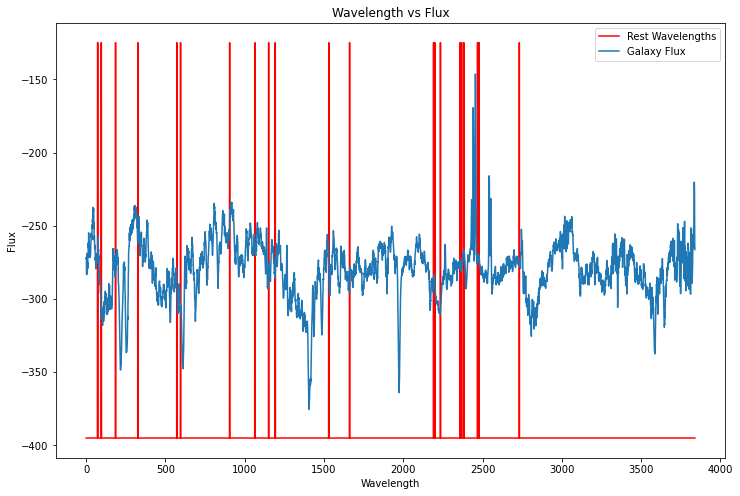

In [61]:
plt.figure(figsize=(12,8))
plt.plot(test_rest,color='red',label='Rest Wavelengths')
plt.plot(new_wavelengths,new_flux,label='Galaxy Flux')
plt.title('Wavelength vs Flux');plt.xlabel('Wavelength');plt.ylabel('Flux')
plt.legend()
plt.show()

In [62]:
pause()


Pause



In [63]:
print('Part 2b: Finding cross-correlation, then plotting using its maximum...')

Part 2b: Finding cross-correlation, then plotting using its maximum...


In [64]:
def physical_crosscor(arr): #the physical cross-correlation function used in project 6
    crosscor=[]
    for shift in range(0,arr.size):
        crosscor.append(np.sum(new_flux*np.roll(arr,shift)))
    return crosscor

In [65]:
ref_crosscor = physical_crosscor(test_rest).index(max(physical_crosscor(test_rest)))
ref_crosscor  #the index where the maximum crosscor happens

2359

In [66]:
ref_peak = new_wavelengths[np.where(new_flux == np.max(new_flux))] #the maximum of the reference flux array
ref_peak

array([2455])

In [67]:
ref_peak-ref_crosscor #difference between the two finds the needed index shift for rest wavelengths

array([96])

In [68]:
test = rest_wavelengths + 112 #the found value of 96 was adjusted to 112 for a better fit to the data
test

array([3839.1, 3841.9, 3981.9, 4002.2, 4083.1, 4214.9, 4453.7, 4476.4,
       4799. , 4974.7, 5072.3, 5120.2, 5525. , 5690.9, 6414. , 6425.8,
       6477.5, 6661.9, 6676.6, 6697.3, 6830.3, 6844.7, 7249.8])

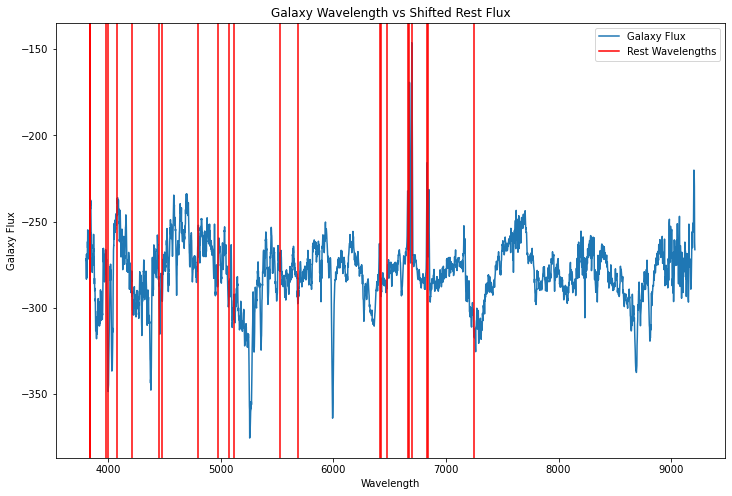

In [69]:
plt.figure(figsize=(12,8))
plt.plot(wavelength,new_flux,label='Galaxy Flux')
for i in test:
    plt.axvline(i,color='red')
plt.axvline(3839.1,color='red',label='Rest Wavelengths') #sets the label for rest wavelengths
plt.title('Galaxy Wavelength vs Shifted Rest Flux');plt.xlabel('Wavelength');plt.ylabel('Galaxy Flux')
plt.legend()
plt.show()

In [70]:
pause()


Pause



## Evaluation of the Redshift and its Uncertainty
Finds the necessary components to evaluate redshift aand its uncertainty.

In [71]:
print('Part 3a: Determining peaks used in redshift calculations')

#move over the red lines to lineup with those 5ish blue peaks above (112 used above)

Part 3a: Determining peaks used in redshift calculations


In [72]:
#difference between original rest and blue peaks using boolean indexing
def peak_finder(lower,upper):
    wavelength_bounds = wavelength[np.where((wavelength > lower) & (wavelength < upper))]
    flux_bounds = new_flux[np.where((wavelength > lower) & (wavelength < upper))]
    return float(wavelength_bounds[flux_bounds == np.max(flux_bounds)]) #the peak value inside the bounds

In [73]:
peak1 = peak_finder(0,4000) #far left peak
peak1

3844.1471614911898

In [74]:
peak2 = peak_finder(4000,4200)
peak2

4084.1337706878226

In [75]:
peak6 = peak_finder(6800,7000) #2nd to far right peak
peak6

6832.819869564685

In [76]:
peak7 = peak_finder(6835,7000) #far right peak
peak7

6848.570003151984

In [77]:
peak5 = peak_finder(6600,6800) #far right of the triple peak
peak5

6697.305005487289

In [78]:
peak4 = peak_finder(6600,6695) #middle of the triple peaks
peak4

6675.75029966914

In [79]:
peak3 = peak_finder(6600,6672) #far left of the triple peak
peak3

6660.393955176714

In [80]:
pause()


Pause



### Finding the Actual Δλ shifts
Distance between each corresponding peak and rest wavelength.

In [81]:
print('Part 3b: Finding the values for delta lambda...')

Part 3b: Finding the values for delta lambda...


In [82]:
#which rest wavelengths to compare to the found peaks above
#Avg of O II, 2nd Ne III , Both N II and H alpha, both S II
peaks = np.array([peak1,peak2,peak3,peak4,peak5,peak6,peak7])
rest_used = np.array([3728.1,3971.1,6549.9,6564.6,6585.3,6718.3,6732.7])

#finds the absolute value of the difference between rest and peak wavelengths, equal to Δλ
def wavelength_difference(rest_arr,peak_arr):
    return abs(rest_arr-peak_arr)
peak_shifts = wavelength_difference(rest_used,peaks)
peak_shifts

array([116.04716149, 113.03377069, 110.49395518, 111.15029967,
       112.00500549, 114.51986956, 115.87000315])

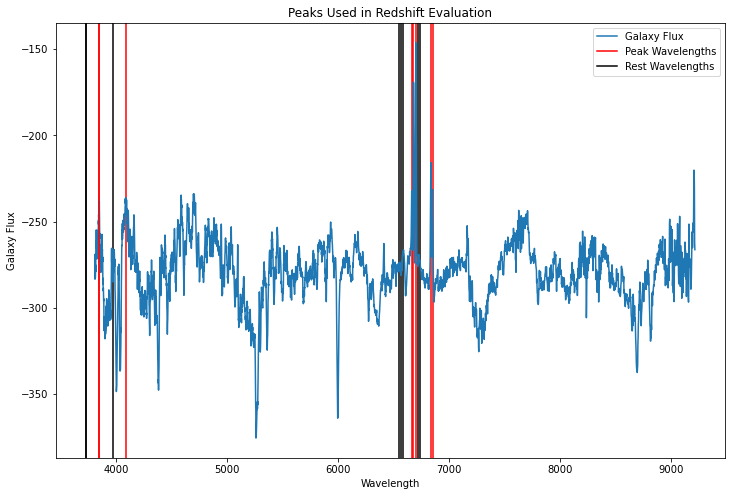

In [83]:
plt.figure(figsize=(12,8))
for i in range(7):
    plt.axvline(peaks[i],color='red')
    plt.axvline(rest_used[i],color='black')
plt.plot(wavelength,new_flux,label='Galaxy Flux')
plt.axvline(3844.1471614911898,color='red',label='Peak Wavelengths') #sets the label for peak wavelengths
plt.axvline(3728.1,color='black',label='Rest Wavelengths') #sets the label for rest wavelengths
plt.title('Peaks Used in Redshift Evaluation');plt.xlabel('Wavelength');plt.ylabel('Galaxy Flux')
plt.legend()
plt.show()

In [84]:
pause()


Pause



### Zooming in on each peak to fit a gaussian
Used to evaluate the error in my Δλ's

#peak1

#commenting this plot out for cleaner command line output

plt.plot(wavelength,new_flux)
for i in test:
    plt.axvline(i,color='red')
plt.xlim(3820,3870)
plt.show()

In [85]:
print('Part 3c: Determining error in my delta lambda values...')

Part 3c: Determining error in my delta lambda values...


In [86]:
from scipy.stats import norm
def gaussian_fit(lower,upper): #uses a bounded wavelength range to fit a normal gaussian function to a peak
    data_test = wavelength[np.where((wavelength>lower) & (wavelength<upper))]
    mean,std = norm.fit(data_test)
    return mean #returns the mean of the gaussian fit
gauss_1 = gaussian_fit(3825,3860)
gauss_1

3842.390152769133

#peak2

#commenting this plot out for cleaner command line output

plt.plot(wavelength,new_flux)
for i in test:
    plt.axvline(i,color='red')
plt.xlim(4050,4110)
plt.show()

In [87]:
gauss_2 = gaussian_fit(4065,4105)
gauss_2

4085.09130121484

#peak3

#commenting this plot out for cleaner command line output

plt.plot(wavelength,new_flux)
for i in test:
    plt.axvline(i,color='red')
plt.xlim(6650,6670)
plt.show()

In [88]:
gauss_3 = gaussian_fit(6651,6668)
gauss_3

6658.863525582254

#peak4

#commenting this plot out for cleaner command line output

plt.plot(wavelength,new_flux)
for i in test:
    plt.axvline(i,color='red')
plt.xlim(6667,6690)
plt.show()

In [89]:
gauss_4 = gaussian_fit(6668,6687)
gauss_4

6677.288807692549

#peak5

#commenting this plot out for cleaner command line output

plt.plot(wavelength,new_flux)
for i in test:
    plt.axvline(i,color='red')
plt.xlim(6685,6715)
plt.show()

In [90]:
gauss_5 = gaussian_fit(6687,6710)
gauss_5

6698.849516837248

#peak6

#commenting this plot out for cleaner command line output

plt.plot(wavelength,new_flux)
for i in test:
    plt.axvline(i,color='red')
plt.xlim(6820,6843)
plt.show()

In [91]:
gauss_6 = gaussian_fit(6825,6841)
gauss_6

6833.608384968352

#peak7

#commenting this plot out for cleaner command line output

plt.plot(wavelength,new_flux)
for i in test:
    plt.axvline(i,color='red')
plt.xlim(6840,6865)
plt.show()

In [92]:
gauss_7 = gaussian_fit(6841,6857)
gauss_7

6849.3618402020265

### Finding the uncertainty in Δλ
Uses gaussian means and actual peaks to find Δλ uncertainty

In [93]:
gauss_means = np.array([gauss_1,gauss_2,gauss_3,gauss_4,gauss_5,gauss_6,gauss_7]) #array of gauss means
delta_uncert = []
for i in range(7):
    x = abs(gauss_means[i]-peaks[i])
    delta_uncert.append(x)
delta_uncert = np.array(delta_uncert) #uncertainty = difference in real peak and gaussian mean
delta_uncert

array([1.75700872, 0.95753053, 1.53042959, 1.53850802, 1.54451135,
       0.7885154 , 0.79183705])

In [94]:
for i in range(7):
    print(f'Δλ for Peak {i+1}: {peak_shifts[i]:.4f} +/- {delta_uncert[i]:.4f}')

Δλ for Peak 1: 116.0472 +/- 1.7570
Δλ for Peak 2: 113.0338 +/- 0.9575
Δλ for Peak 3: 110.4940 +/- 1.5304
Δλ for Peak 4: 111.1503 +/- 1.5385
Δλ for Peak 5: 112.0050 +/- 1.5445
Δλ for Peak 6: 114.5199 +/- 0.7885
Δλ for Peak 7: 115.8700 +/- 0.7918


In [95]:
pause()


Pause



### Uncertainty in redshift

In [96]:
print('Part 3d: Calculating redshifts for each peak and the average redshift...')

Part 3d: Calculating redshifts for each peak and the average redshift...


In [97]:
redshifts = []
for i in range(7):
    redshifts.append(peak_shifts[i]/rest_used[i]) #redshift values
    
redshift_error = []
for i in range(7):
    redshift_error.append(delta_uncert[i]/rest_used[i])
redshift_error = np.array(redshift_error) #error in redshift values
for i in range(7):
    print(f'Redshift for Peak {i+1}: {redshifts[i]:.4f} +/- {redshift_error[i]:.6f}')

Redshift for Peak 1: 0.0311 +/- 0.000471
Redshift for Peak 2: 0.0285 +/- 0.000241
Redshift for Peak 3: 0.0169 +/- 0.000234
Redshift for Peak 4: 0.0169 +/- 0.000234
Redshift for Peak 5: 0.0170 +/- 0.000235
Redshift for Peak 6: 0.0170 +/- 0.000117
Redshift for Peak 7: 0.0172 +/- 0.000118


In [98]:
#average redshift +/- propagated error
errors = [i**2 for i in redshift_error]
prop_error = np.sqrt(sum(errors))/7
print(f'The average redshift for the galaxy is {np.mean(redshifts):.4f} +/- {prop_error:.6f}')

The average redshift for the galaxy is 0.0207 +/- 0.000098


In [99]:
redshift_var = np.var(redshifts)
print(f'The true variance of the redshifts: {redshift_var:.6f}')
#therefore I slightly overestimated the error

The true variance of the redshifts: 0.000034


In [100]:
pause()


Pause



## Scaling with Spectral Lines
An analysis/discussion of this section can be found in the project write-up.

In [101]:
print('Part 4: Determining uncertainty with more spectral lines...')

Part 4: Determining uncertainty with more spectral lines...


#extra peak 1, OI = 6302

#commenting this plot out for cleaner command line output

plt.plot(wavelength,new_flux)
for i in test:
    plt.axvline(i,color='red')
plt.xlim(6395,6425)
plt.show()

In [102]:
gauss_extra1 = gaussian_fit(6400,6425)
gauss_extra1 #mean of gaussian fitted to peak

6412.099726059912

In [103]:
peak_extra1 = peak_finder(6400,6425) #real peak above
delta_extra1 = wavelength_difference(peak_extra1,6302) #delta lambda above
uncert1 = abs(gauss_extra1-peak_extra1) #uncertainty in delta lambda

In [104]:
extra_redshift = delta_extra1/6302
extra_uncert = uncert1/6302
print(f'Extra line redshift: {extra_redshift:.6f} +/- {extra_uncert:.6f}')

Extra line redshift: 0.017236 +/- 0.000235


In [105]:
new_redshift = (sum(redshifts) + extra_redshift)/8
new_uncert = np.sqrt(sum(errors)+(extra_uncert**2))/8

print(f'New average redshift: {new_redshift:.4f} +/- {new_uncert:.6f}')

New average redshift: 0.0202 +/- 0.000091


In [106]:
new_var = np.var([0.0311,0.0285,0.0169,0.0169,0.0170,0.0170,0.0172,0.0172])
print(f'The new variance of the redshifts: {new_var:.6f}')

The new variance of the redshifts: 0.000031


In [107]:
pause()


Pause



## Systematic Differences
This section will be discussed in the project write-up.

In [108]:
print('Part 5: Looking for a trend in the redshift values...')

Part 5: Looking for a trend in the redshift values...


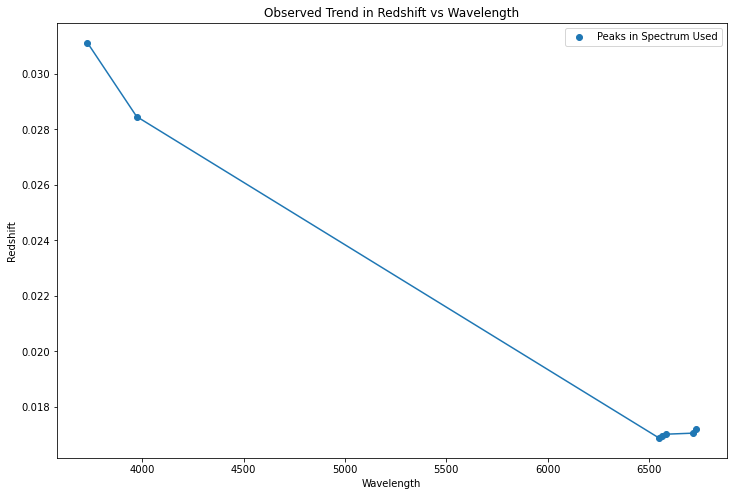

In [109]:
#Higher redshift at lower wavelengths since we use similar Δλ for each line
plt.figure(figsize=(12,8))
plt.scatter(rest_used,redshifts,label='Peaks in Spectrum Used')
plt.plot(rest_used,redshifts)
plt.title('Observed Trend in Redshift vs Wavelength');plt.xlabel('Wavelength');plt.ylabel('Redshift')
plt.legend()
plt.show()

In [110]:
#i introduced a personal bias towards what are good peaks